# Receptor-ligand permutation test

This vignette demonstrates the usage of the permutation test as described in [CellPhoneDB](https://www.cellphonedb.org/) with the interations extracted from [OmniPath](https://omnipathdb.org/) database developed by [Saezlab](https://saezlab.org/).

The downside is that in the original implementation, apart from being inefficient, the CellPhoneDB database has only been manually curated for human interactions. To overcome this issue, we make use of the OmniPath database (containing CellPhoneDB as one of its many sources) which also focuses on literature curated rodent signalling pathways.

## Imports

In [1]:
import numpy as np
import pandas as pd

import scanpy as sc
import squidpy as sq

from anndata import AnnData

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


# Load the mouse data

In [2]:
adata = sc.datasets.paul15()

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'paul15_clusters' as categorical
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Trying to set attribute `.uns` of view, copying.


Normalize and create `.raw`.

In [3]:
sc.pp.normalize_per_cell(adata)

adata.raw = adata.copy()

## Run the CellPhoneDB's permutation test

### Use only CellPhoneDB as a resource

For mouse data, CellPhoneDB uses the ortholog genes, downloaded from biomart. They convert the mouse genes into their human orthologs and use that as an input ([latest source](https://github.com/Teichlab/cellphonedb/issues/194#issuecomment-721748905)).

In [4]:
res = sq.gr.ligrec(adata, "paul15_clusters",
                   fdr_method=None, copy=True,
                   interactions_params={"resources": "CellPhoneDB"},
                   threshold=0.1, seed=0, n_perms=10000, n_jobs=1)
df = res.pvalues
print("Number of CellPhoneDB interactions (mouse data):", len(df))

df.head()


Number of CellPhoneDB interactions (mouse data): 11


cluster_1         10GMP                                                        \
cluster_2         10GMP    11DC 12Baso  13Baso    14Mo    15Mo   16Neu  17Neu   
source target                                                                   
GRN    TNFRSF1A  0.2868  0.4736  0.531     NaN     NaN     NaN     NaN  0.204   
       TNFRSF1B     NaN     NaN    NaN  0.1943  0.0358  0.0444  0.0302    NaN   
TGFB1  TGFBR3       NaN     NaN    NaN     NaN     NaN     NaN     NaN    NaN   
       TGFBR2       NaN     NaN    NaN     NaN     NaN     NaN     NaN    NaN   
       ITGAV        NaN     NaN    NaN     NaN     NaN     NaN     NaN    NaN   

cluster_1                        ...    9GMP                                 \
cluster_2         18Eos 19Lymph  ... 19Lymph 1Ery 2Ery    3Ery 4Ery    5Ery   
source target                    ...                                          
GRN    TNFRSF1A  0.7944  0.3359  ...  0.1427  NaN  NaN     NaN  NaN  0.8665   
       TNFRSF1B     NaN     NaN  ...     NaN  NaN  NaN     NaN  NaN     NaN   
TGFB1  TGFBR3       NaN     NaN  ...     NaN  NaN  NaN  0.0648  NaN     NaN   
       TGFBR2    0.0061     NaN  ...     NaN  NaN  NaN     NaN  NaN     NaN   
       ITGAV        NaN     NaN  ...     NaN  NaN  NaN     NaN  NaN     NaN   

cluster_1                                  
cluster_2       6Ery 7MEP     8Mk    9GMP  
source target                              
GRN    TNFRSF1A  NaN  NaN     NaN  0.0908  
       TNFRSF1B  NaN  NaN     NaN     NaN  
TGFB1  TGFBR3    NaN  NaN  0.0165     NaN  
       TGFBR2    NaN  NaN     NaN     NaN  
       ITGAV     NaN  NaN     NaN     NaN  

[5 rows x 361 columns]

The tori mark significant p-values (`alpha=0.001` by default). `molecule1` belongs to the source cluster (top) whereas `moleule2` to the target clusters.

/home/michal/.miniconda3/envs/cellrank/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


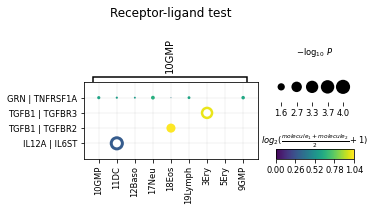

In [6]:
sq.pl.ligrec(res, source_groups="10GMP")

### Use all available resources from OmniPath

In [7]:
res = sq.gr.ligrec(adata, "paul15_clusters",
                   fdr_method=None, copy=True,
                   threshold=0.1, seed=0, n_perms=10000, n_jobs=1)
df = res.pvalues
print("Number of OmniPath interactions (mouse data):", len(df))

df.head()

  0%|          | 0/10000 [00:00<?, ?permutation/s]

Number of OmniPath interactions (mouse data): 107


cluster_1       10GMP                                                          \
cluster_2       10GMP    11DC  12Baso  13Baso    14Mo    15Mo   16Neu   17Neu   
source target                                                                   
FYN    THY1       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
       ITGB1   0.0060  0.0843  0.7125  0.0068  0.0036  0.0067  0.4110  0.5669   
TGFB1  ITGB1   0.0009  0.0206  0.1831  0.0022  0.0014  0.0010  0.0505  0.2222   
ANGPT1 ITGB1      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
VEGFA  ITGB1      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

cluster_1                      ...    9GMP                                  \
cluster_2       18Eos 19Lymph  ... 19Lymph    1Ery    2Ery    3Ery    4Ery   
source target                  ...                                           
FYN    THY1       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
       ITGB1   0.3759     NaN  ...     NaN  0.0953  0.0039  0.0001  0.0083   
TGFB1  ITGB1   0.1867     NaN  ...     NaN  0.1474  0.0585  0.0093  0.0590   
ANGPT1 ITGB1      NaN     NaN  ...     NaN  0.0744  0.0001     NaN  0.0018   
VEGFA  ITGB1      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   

cluster_1                                              
cluster_2        5Ery    6Ery    7MEP     8Mk    9GMP  
source target                                          
FYN    THY1       NaN     NaN     NaN     NaN     NaN  
       ITGB1   0.0944  0.0291  0.1237  0.0018  0.0292  
TGFB1  ITGB1   0.2032  0.1306  0.2321  0.0170  0.0691  
ANGPT1 ITGB1   0.0430  0.0104  0.0638  0.0005  0.0130  
VEGFA  ITGB1      NaN     NaN     NaN     NaN     NaN  

[5 rows x 361 columns]

/home/michal/.miniconda3/envs/cellrank/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


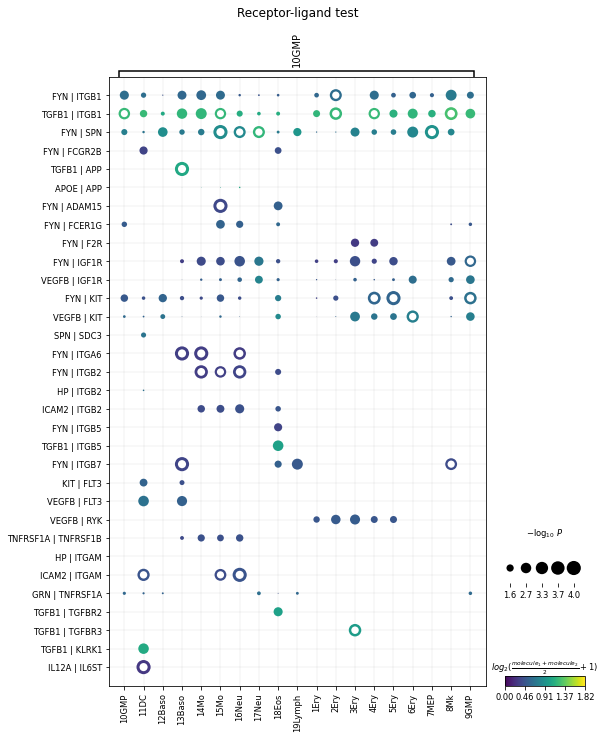

In [8]:
sq.pl.ligrec(res, source_groups="10GMP")

# Load the human data

In [9]:
adata = sc.datasets.pbmc3k_processed()
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

## Run the CellPhoneDB's permutation test

### Use only CellPhoneDB as a resource

In [10]:
res = sq.gr.ligrec(adata, "louvain",
                   fdr_method=None, copy=True,
                   interactions_params={"resources": "CellPhoneDB"},
                   threshold=0.1, seed=0, n_perms=10000, n_jobs=1)
df = res.pvalues
print("Number of CellPhoneDB interactions (human data):", len(df))

df.head()

  0%|          | 0/10000 [00:00<?, ?permutation/s]

Number of CellPhoneDB interactions (human data): 76


cluster_1     B cells                                                          \
cluster_2     B cells CD14+ Monocytes CD4 T cells CD8 T cells Dendritic cells   
source target                                                                   
DLL1   NOTCH1     NaN             NaN         NaN         NaN             NaN   
TNF    NOTCH1     NaN             NaN         NaN         NaN             NaN   
DLL3   NOTCH1     NaN             NaN         NaN         NaN             NaN   
DLL1   NOTCH2     NaN             NaN         NaN         NaN             NaN   
DLL3   NOTCH2     NaN             NaN         NaN         NaN             NaN   

cluster_1                                               CD14+ Monocytes  \
cluster_2     FCGR3A+ Monocytes Megakaryocytes NK cells         B cells   
source target                                                             
DLL1   NOTCH1               NaN            NaN      NaN             NaN   
TNF    NOTCH1               NaN            NaN      NaN             NaN   
DLL3   NOTCH1               NaN            NaN      NaN             NaN   
DLL1   NOTCH2               NaN            NaN      NaN             NaN   
DLL3   NOTCH2               NaN            NaN      NaN             NaN   

cluster_1                      ... Megakaryocytes          NK cells  \
cluster_2     CD14+ Monocytes  ... Megakaryocytes NK cells  B cells   
source target                  ...                                    
DLL1   NOTCH1             NaN  ...            NaN      NaN      NaN   
TNF    NOTCH1             NaN  ...            NaN      NaN      NaN   
DLL3   NOTCH1             NaN  ...            NaN      NaN      NaN   
DLL1   NOTCH2             NaN  ...            NaN      NaN      NaN   
DLL3   NOTCH2             NaN  ...            NaN      NaN      NaN   

cluster_1                                                              \
cluster_2     CD14+ Monocytes CD4 T cells CD8 T cells Dendritic cells   
source target                                                           
DLL1   NOTCH1             NaN         NaN         NaN             NaN   
TNF    NOTCH1             NaN         NaN         NaN             NaN   
DLL3   NOTCH1             NaN         NaN         NaN             NaN   
DLL1   NOTCH2             NaN         NaN         NaN             NaN   
DLL3   NOTCH2             NaN         NaN         NaN             NaN   

cluster_1                                                
cluster_2     FCGR3A+ Monocytes Megakaryocytes NK cells  
source target                                            
DLL1   NOTCH1               NaN            NaN      NaN  
TNF    NOTCH1               NaN            NaN      NaN  
DLL3   NOTCH1               NaN            NaN      NaN  
DLL1   NOTCH2               NaN            NaN      NaN  
DLL3   NOTCH2               NaN            NaN      NaN  

[5 rows x 64 columns]

/home/michal/.miniconda3/envs/cellrank/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


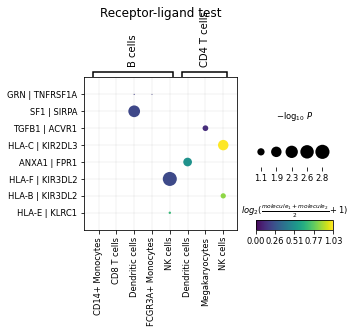

In [11]:
sq.pl.ligrec(res, source_groups=["CD4 T cells", "B cells"], dendrogram=None)

### Use all available resources from OmniPath

In [12]:
res = sq.gr.ligrec(adata, "louvain",
                   fdr_method=None, copy=True,
                   threshold=0.1, seed=0, n_perms=10000, n_jobs=1)
df = res.pvalues
print("Number of OmniPath interactions (human data):", len(df))

df.head()

  0%|          | 0/10000 [00:00<?, ?permutation/s]

Number of OmniPath interactions (human data): 510


cluster_1     B cells                                                          \
cluster_2     B cells CD14+ Monocytes CD4 T cells CD8 T cells Dendritic cells   
source target                                                                   
FYN    ITGB1      NaN             NaN         NaN         NaN             NaN   
RAC1   ITGB1      NaN             NaN         NaN         NaN             NaN   
HGF    ITGB1      NaN             NaN         NaN         NaN             NaN   
TGFB1  ITGB1      NaN             NaN         NaN         NaN             NaN   
TGFB3  ITGB1      NaN             NaN         NaN         NaN             NaN   

cluster_1                                               CD14+ Monocytes  \
cluster_2     FCGR3A+ Monocytes Megakaryocytes NK cells         B cells   
source target                                                             
FYN    ITGB1                NaN            NaN      NaN             NaN   
RAC1   ITGB1                NaN         0.9954      NaN             NaN   
HGF    ITGB1                NaN            NaN      NaN             NaN   
TGFB1  ITGB1                NaN            NaN      NaN             NaN   
TGFB3  ITGB1                NaN            NaN      NaN             NaN   

cluster_1                      ... Megakaryocytes          NK cells  \
cluster_2     CD14+ Monocytes  ... Megakaryocytes NK cells  B cells   
source target                  ...                                    
FYN    ITGB1              NaN  ...            NaN      NaN      NaN   
RAC1   ITGB1              NaN  ...         0.1756      NaN      NaN   
HGF    ITGB1              NaN  ...            NaN      NaN      NaN   
TGFB1  ITGB1              NaN  ...            NaN      NaN      NaN   
TGFB3  ITGB1              NaN  ...            NaN      NaN      NaN   

cluster_1                                                              \
cluster_2     CD14+ Monocytes CD4 T cells CD8 T cells Dendritic cells   
source target                                                           
FYN    ITGB1              NaN         NaN         NaN             NaN   
RAC1   ITGB1              NaN         NaN         NaN             NaN   
HGF    ITGB1              NaN         NaN         NaN             NaN   
TGFB1  ITGB1              NaN         NaN         NaN             NaN   
TGFB3  ITGB1              NaN         NaN         NaN             NaN   

cluster_1                                                
cluster_2     FCGR3A+ Monocytes Megakaryocytes NK cells  
source target                                            
FYN    ITGB1                NaN         0.0018      NaN  
RAC1   ITGB1                NaN         0.0912      NaN  
HGF    ITGB1                NaN            NaN      NaN  
TGFB1  ITGB1                NaN         0.0007      NaN  
TGFB3  ITGB1                NaN            NaN      NaN  

[5 rows x 64 columns]

/home/michal/.miniconda3/envs/cellrank/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


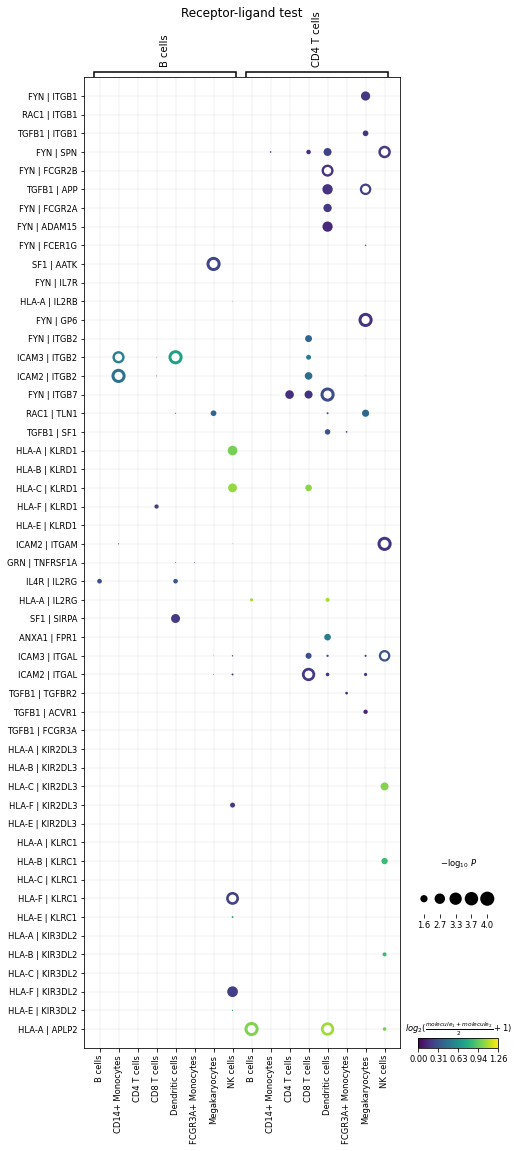

In [13]:
sq.pl.ligrec(res, source_groups=["CD4 T cells", "B cells"])

# Conluding remarks

Using OmniPath as an interation source yields approx. ~7x more interactions than from CellPhoneDB for the selected human data and ~11x interactions for the seleted mouse data (internally in `squidpy.gr.ligrec`, we map the mouse gene symbols to human simply by uppercasing).

In the context of spatial tools, the goal is to use the permutation test from CellPhoneDB to analyze receptor-ligand interaction pairs in clusters that are spatially close.

<AxesSubplot:xlabel='dataset', ylabel='n_interactions'>

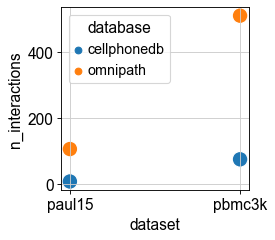

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sc.set_figure_params(facecolor="white", figsize=(8, 8))


dic = {
    "dataset" : ["paul15","pbmc3k","paul15","pbmc3k"],
    "organism" : ["mouse","human","mouse","human"],
    "n_interactions" : [9,76,107,510],
    "database" : ["cellphonedb","cellphonedb","omnipath","omnipath"] 
}
df = pd.DataFrame(dic)
fix, ax = plt.subplots(1,1,figsize=(3,3))
sns.scatterplot(data=df, x="dataset", y="n_interactions",hue="database", s=200)

